In [1]:
import os
import os.path
import random 
from skimage.color import rgb2gray
from skimage import data

import numpy as np
import pandas as pd
import cv2 
import scipy

import matplotlib.pyplot as plt; plt.rcdefaults()

from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [2]:
imagepath = "RawData/"
image_path = 'RawData/R-233_5-8-6_000110.T000.D000.P000.H000.PLIF1.TIF'

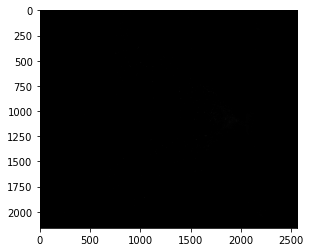

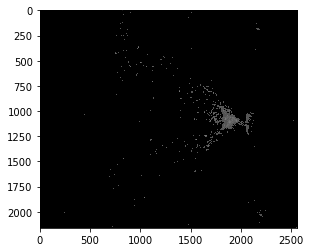

In [3]:
import cv2
import numpy as np

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
       for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

x = 'RawData/R-233_5-8-6_000110.T000.D000.P000.H000.PLIF1.TIF'
original = cv2.imread(x, 1)
plt.imshow(original)
plt.show()

gamma = 5
adjusted = adjust_gamma(original, gamma=gamma)
plt.imshow(adjusted)
plt.show()

In [4]:
def test_log(image):
    image_gray = rgb2gray(image)
    
    blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)

    fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        ax[idx].set_title(title)
        ax[idx].imshow(image)
        for blob in blobs:
            y, x, r = blob
            c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
            ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    plt.tight_layout()
    plt.show()

/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))
/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)


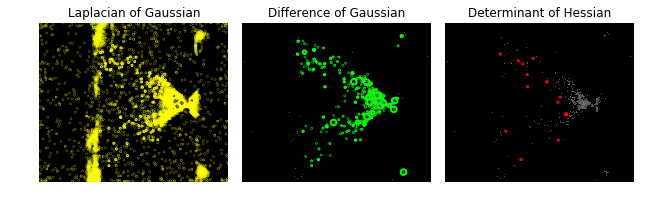

In [5]:
y = test_log(adjusted)
y

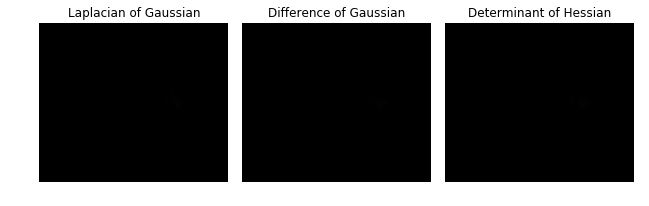

In [6]:
z = test_log(original)

In [55]:
def flame_blobs(image_path, gamma, plot_results=True):
    import cv2
    import numpy as np
    import time
    import os
    import os.path
    import random 
    from skimage.color import rgb2gray
    from skimage import data

    import numpy as np
    import pandas as pd
    import cv2 
    import scipy

    import matplotlib.pyplot as plt; plt.rcdefaults()

    from math import sqrt
    from skimage.feature import blob_dog, blob_log, blob_doh
    from skimage.color import rgb2gray

    start = time.time()
    
    # Adjust the image
    image = cv2.imread(image_path, 1)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")
    corrected = cv2.LUT(image, table)
    
    image_gray = rgb2gray(corrected)

    blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)

    res_counts = {}

    # only display the results if specified
    if not plot_results:
        for idx, (blobs, color, title) in enumerate(sequence):
            res_counts[title] = len(blobs)
        end = time.time()
        return res_counts, (end-start) * 1000
    
    fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()
    for idx, (blobs, color, title) in enumerate(sequence):
        ax[idx].set_title(title)
        ax[idx].imshow(image)
        res_counts[title] = len(blobs)
        for blob in blobs:
            y, x, r = blob
            c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
            ax[idx].add_patch(c)
        ax[idx].set_axis_off()


    plt.tight_layout()
    plt.show()
    
    end = time.time()
    return res_counts, (end-start) * 1000

In [56]:
abc = flame_blobs(image_path, 3, plot_results=False)

/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/ryan/.miniconda3/envs/funcx/lib/python3.6/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


In [58]:
abc

({'Laplacian of Gaussian': 113,
  'Difference of Gaussian': 195,
  'Determinant of Hessian': 0},
 27122.406482696533)

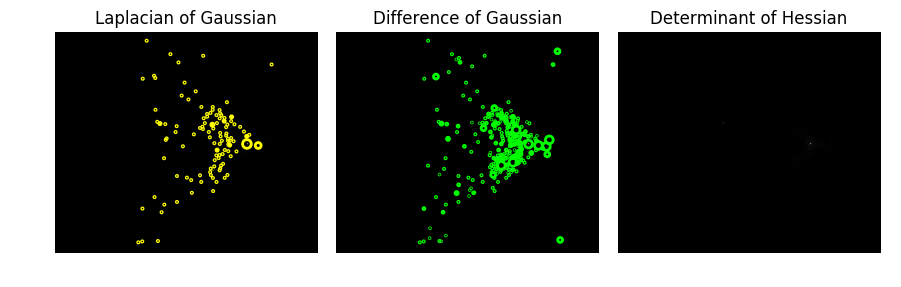

{'Laplacian of Gaussian': 111, 'Difference of Gaussian': 234, 'Determinant of Hessian': 0}


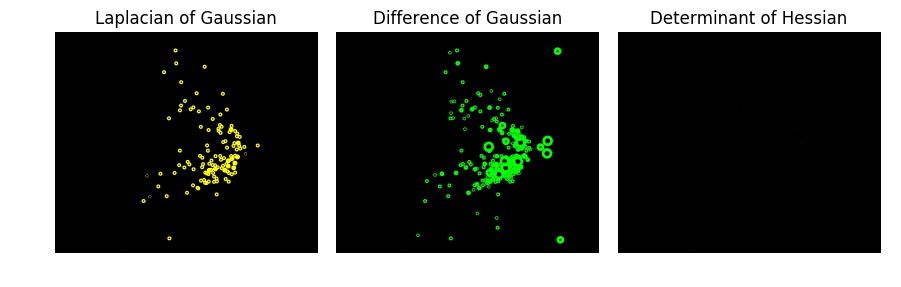

{'Laplacian of Gaussian': 113, 'Difference of Gaussian': 191, 'Determinant of Hessian': 0}


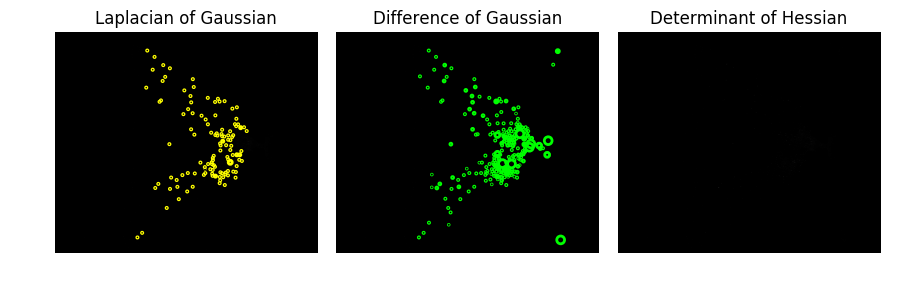

{'Laplacian of Gaussian': 117, 'Difference of Gaussian': 221, 'Determinant of Hessian': 0}


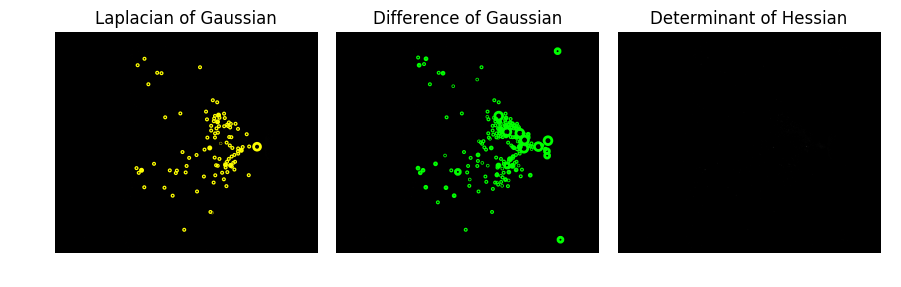

{'Laplacian of Gaussian': 95, 'Difference of Gaussian': 178, 'Determinant of Hessian': 0}


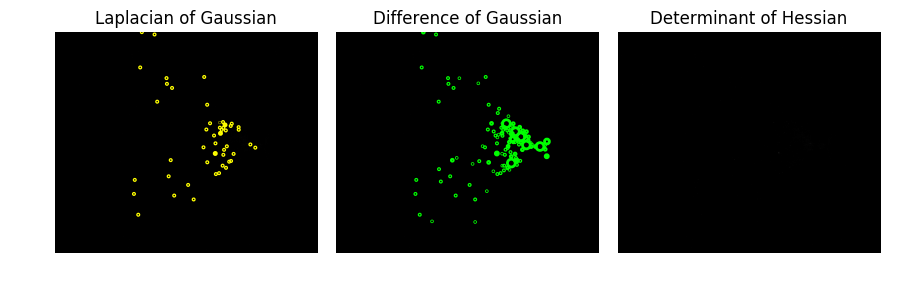

{'Laplacian of Gaussian': 48, 'Difference of Gaussian': 112, 'Determinant of Hessian': 0}


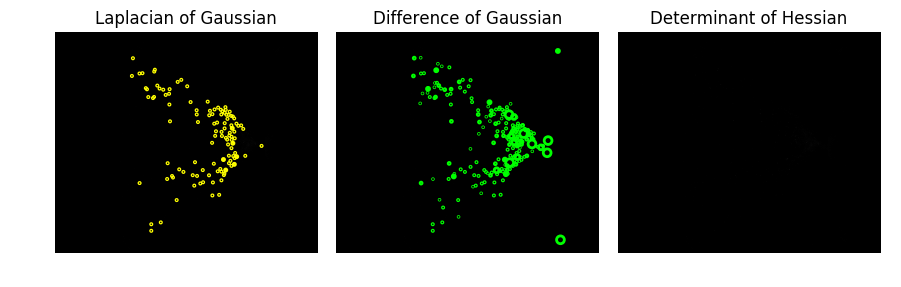

{'Laplacian of Gaussian': 113, 'Difference of Gaussian': 195, 'Determinant of Hessian': 0}


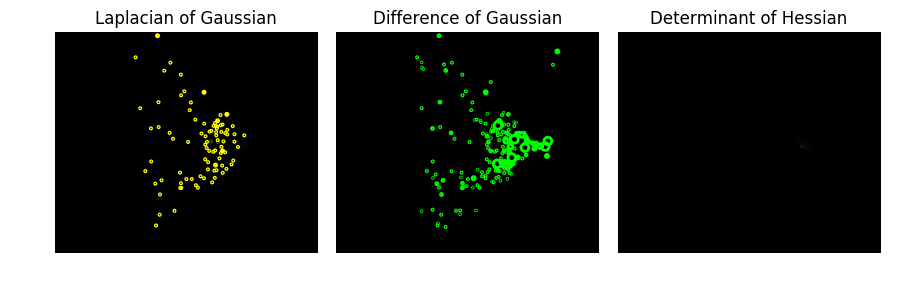

{'Laplacian of Gaussian': 90, 'Difference of Gaussian': 176, 'Determinant of Hessian': 0}


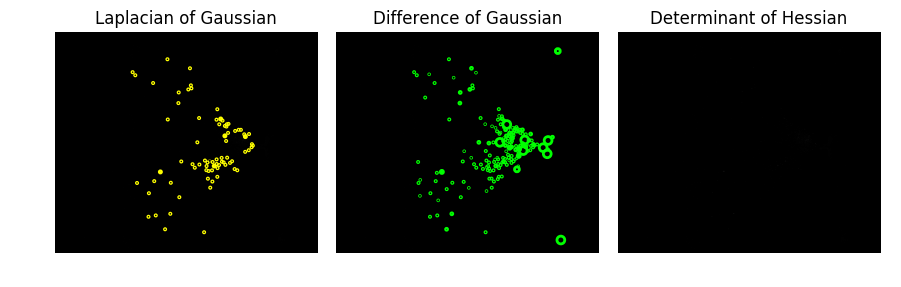

{'Laplacian of Gaussian': 77, 'Difference of Gaussian': 171, 'Determinant of Hessian': 0}


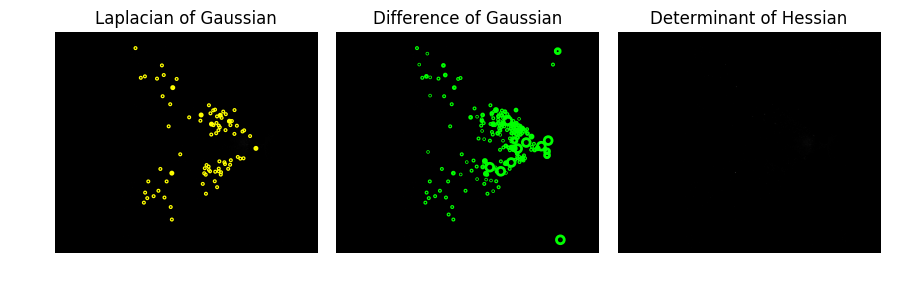

{'Laplacian of Gaussian': 80, 'Difference of Gaussian': 185, 'Determinant of Hessian': 0}


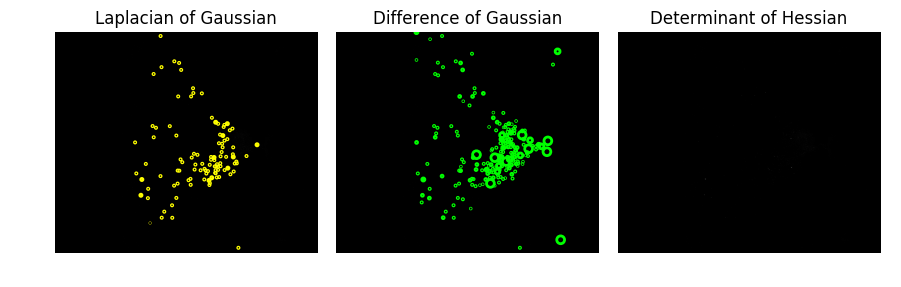

{'Laplacian of Gaussian': 103, 'Difference of Gaussian': 199, 'Determinant of Hessian': 0}


In [121]:
for filename in os.listdir(imagepath):
    image_name = imagepath + filename
    res = flame_blobs(image_name, 3)
    print(res[0])

In [22]:
for filename in os.listdir(imagepath):
    image_name = imagepath + filename
    res = flame_blobs(image_name, 3, plot_results=False)
    print(res[1])
    break

{'Laplacian of Gaussian': 111, 'Difference of Gaussian': 234, 'Determinant of Hessian': 0}


# funcX

In [24]:
from funcx.sdk.client import FuncXClient

In [73]:
local_ep = '4325781a-fcfc-4dac-9017-aa5bf97db85b'
theta_ep = 'f3d6b327-d262-43a2-96da-0dbf1f5468b2'
cooley_ep = '2bf4b19b-eaec-42b2-a191-b1542f3cc868'

fxc = FuncXClient()

In [70]:
def hello_world(name):
    return f"Hello, {name}"

hello_func = fxc.register_function(hello_world, description="Test hello world.")
print(hello_func)

f3321cb2-194c-4e4f-88e5-893ff28dcbe2


In [71]:
name = "Ryan"
res = fxc.run(name=name, endpoint_id=local_ep, function_id=hello_func)

In [72]:
fxc.get_result(res)

'Hello, Ryan'

In [74]:
name = "Cooley"
res = fxc.run(name=name, endpoint_id=cooley_ep, function_id=hello_func)

In [75]:
fxc.get_result(res)

'Hello, Cooley'

In [63]:
flame_func = fxc.register_function(flame_blobs, description="Flame function.")
print(flame_func)

2a096756-9a8b-421f-828a-fdc959402fd4


Run locally

In [64]:
input_loc = "/home/ryan/src/MERF/FlameSpray/RawData/R-233_5-8-6_000114.T000.D000.P000.H000.PLIF1.TIF"

In [65]:
fxres = fxc.run(input_loc, gamma=3, plot_results=False, endpoint_id=local_ep, function_id=flame_func)

In [67]:
fx_result = fxc.get_result(fxres)

In [68]:
fx_result

({'Laplacian of Gaussian': 77,
  'Difference of Gaussian': 171,
  'Determinant of Hessian': 0},
 27378.360271453857)

Run on Cooley

In [76]:
input_loc = "/home/rchard/DLHub/ryan/flame/RawData/R-233_5-8-6_000119.T000.D000.P000.H000.PLIF1.TIF"

In [77]:
fxres = fxc.run(input_loc, gamma=3, plot_results=False, endpoint_id=cooley_ep, function_id=flame_func)

In [80]:
fx_result = fxc.get_result(fxres)

In [81]:
fx_result

({'Laplacian of Gaussian': 95,
  'Difference of Gaussian': 178,
  'Determinant of Hessian': 0},
 33311.978816986084)

# PCA

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [167]:
labels_fin = []
for i in X:
    if (i[0]<10 or i[0] > 450):
        labels_fin.append("Spill")
    else:
        labels_fin.append("No Spill")

In [168]:
df = pd.DataFrame(columns = ['B1', 'B2', 'B3', 'Type'])
i = 0
for arr in X:
    df = df.append({'B1': arr[0], 'B2': arr[1], 'B3': arr[2], 'Type': labels_fin[i]}, ignore_index=True)
    i = i + 1

In [169]:
df

B1   B2 B3      Type
0    249  142  0  No Spill
1    372  248  0  No Spill
2      1    0  0     Spill
3    231  118  1  No Spill
4    200  134  0  No Spill
5    335  115  0  No Spill
6      1    0  0     Spill
7    234   46  0  No Spill
8    380  173  0  No Spill
9    674  313  1     Spill
10   263  189  0  No Spill
11   160   17  0  No Spill
12   499  305  0     Spill
13   390  145  0  No Spill
14   239  145  0  No Spill
15   488  172  2     Spill
16   312  130  0  No Spill
17   260   74  0  No Spill
18   217  170  0  No Spill
19   313  137  0  No Spill
20    12    2  0  No Spill
21   261  161  0  No Spill
22   354  144  0  No Spill
23    55    7  0  No Spill
24   434  183  1  No Spill
25   252  132  0  No Spill
26   264  119  0  No Spill
27   150   18  0  No Spill
28   297  179  0  No Spill
29   448  160  1  No Spill
..   ...  ... ..       ...
120  304  123  0  No Spill
121   70   14  0  No Spill
122  292  143  0  No Spill
123  241  144  0  No Spill
124   27    1  0  No Spill
125  480  160  1     Spill
126  263  121  0  No Spill
127  256  132  0  No Spill
128  443  154  0  No Spill
129  831  280  0     Spill
130  206  137  0  No Spill
131  323  184  0  No Spill
132  472  383  1     Spill
133  257  154  0  No Spill
134  476  157  0     Spill
135  236  139  0  No Spill
136    1    0  0     Spill
137  353  269  1  No Spill
138  229  116  0  No Spill
139  626  169  0     Spill
140  510  213  0     Spill
141  640  263  0     Spill
142  232  149  0  No Spill
143  109   14  0  No Spill
144    1    0  0     Spill
145  209  164  1  No Spill
146  338  187  0  No Spill
147  562  141  0     Spill
148  350  149  0  No Spill
149  233   23  0  No Spill

[150 rows x 4 columns]

In [170]:
features = ['B1', 'B2']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Type']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)  

/anaconda2/envs/model1/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/envs/model1/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [171]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [172]:
finalDf = pd.concat([principalDf, df[['Type']]], axis = 1)

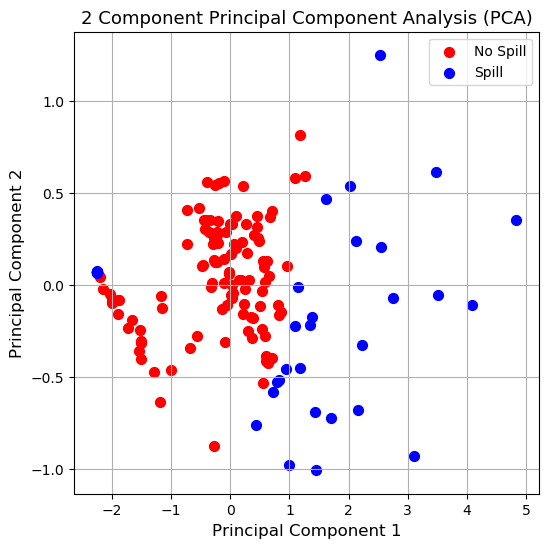

In [173]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 Component Principal Component Analysis (PCA)', fontsize = 13)
targets = ['No Spill', 'Spill']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
import os

In [36]:
training = []
labels = []

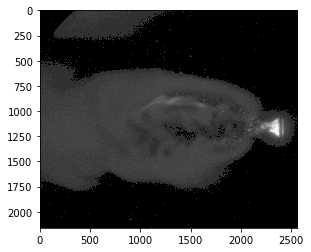

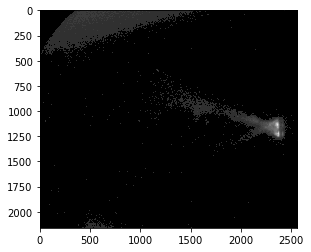

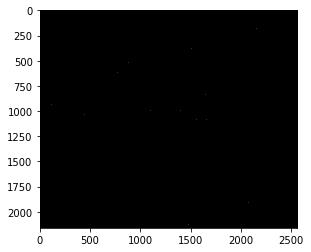

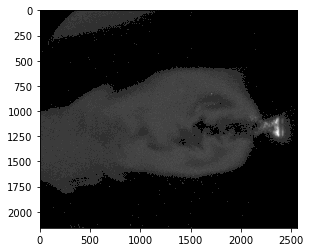

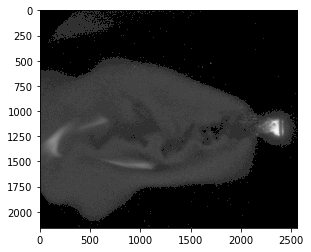

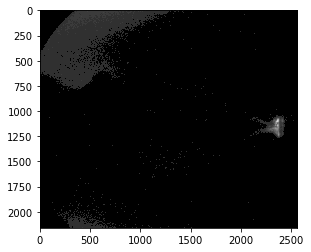

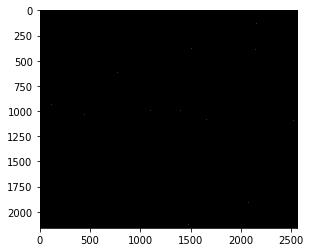

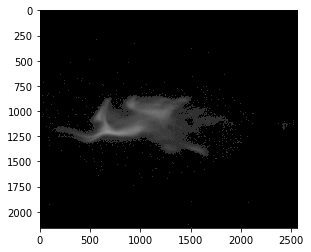

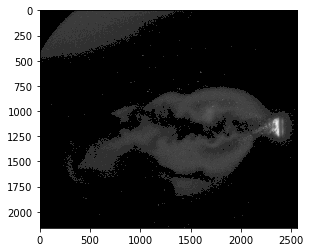

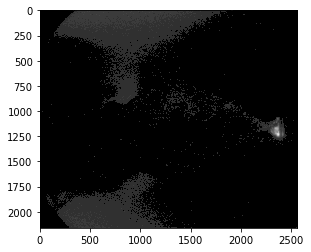

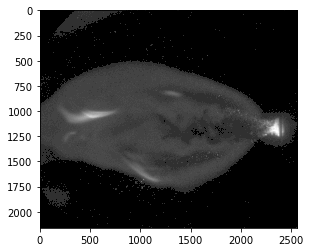

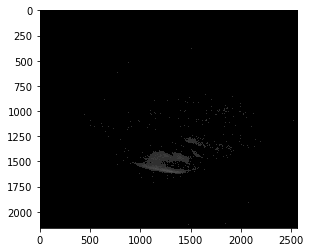

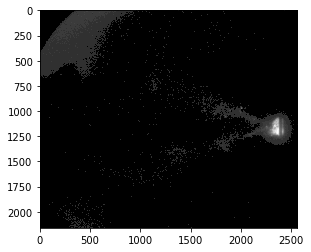

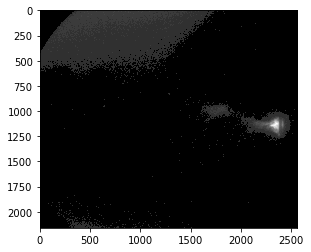

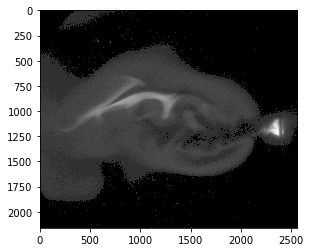

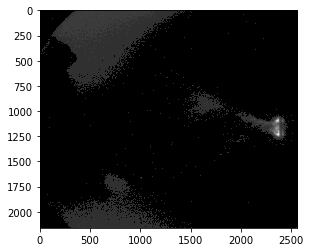

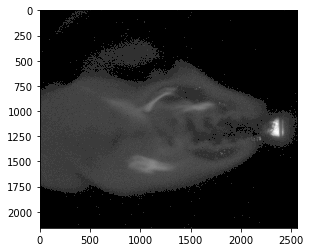

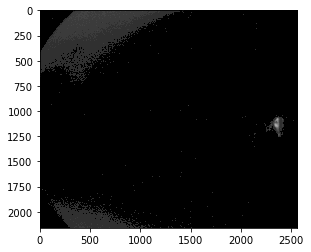

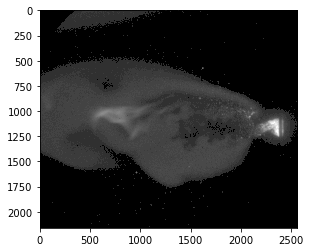

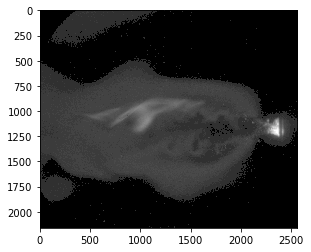

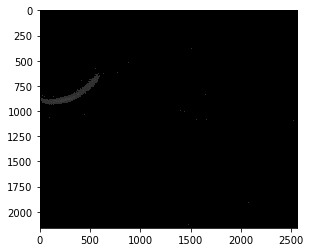

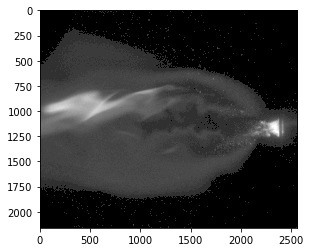

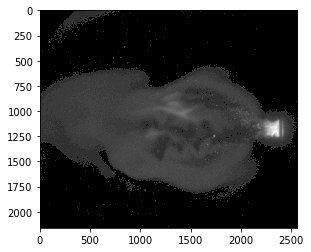

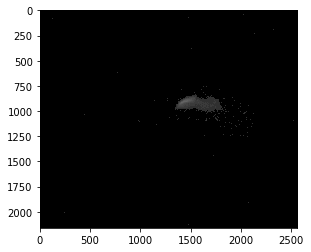

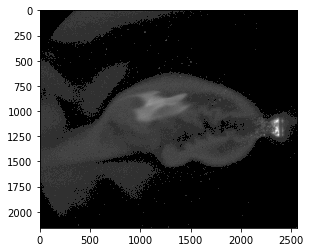

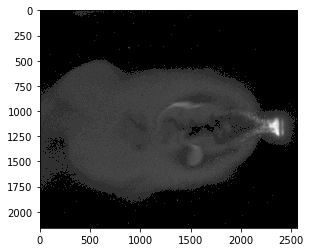

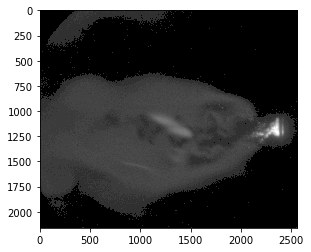

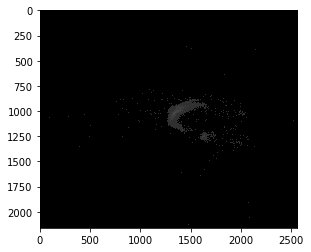

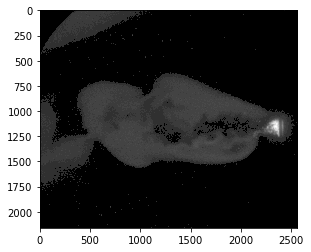

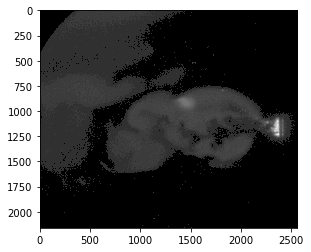

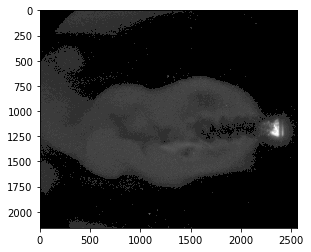

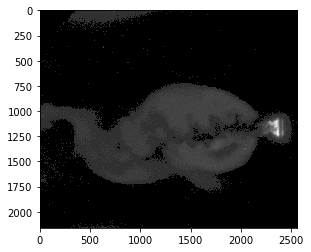

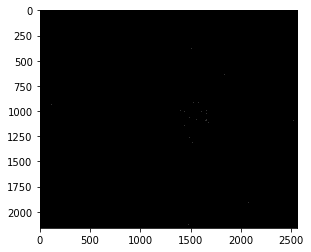

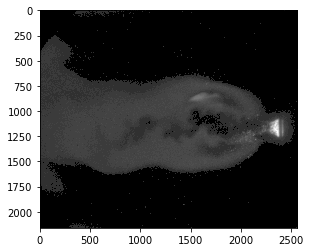

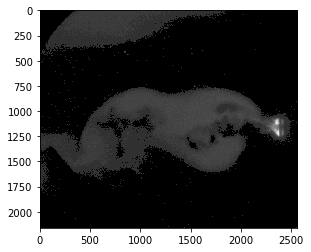

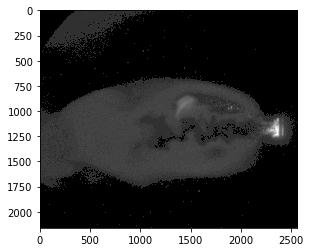

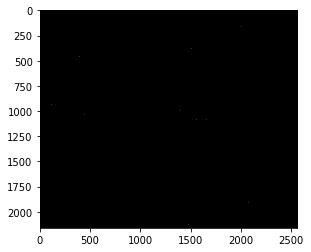

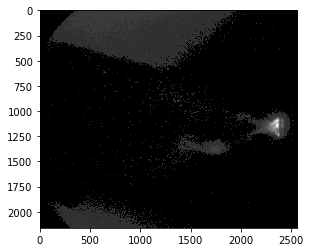

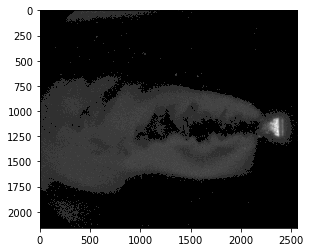

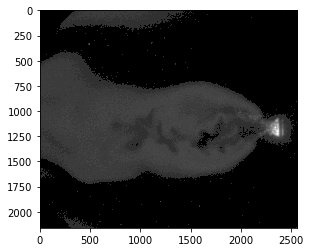

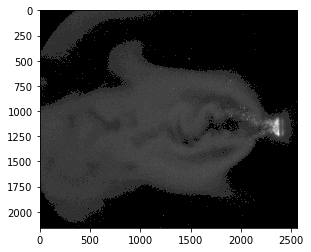

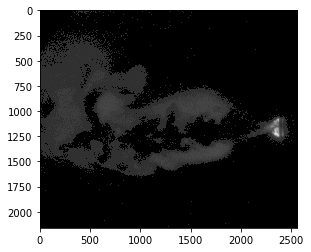

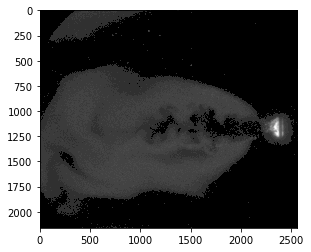

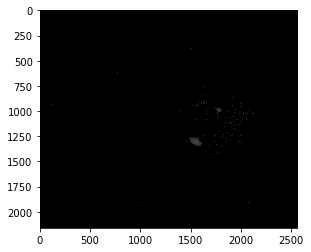

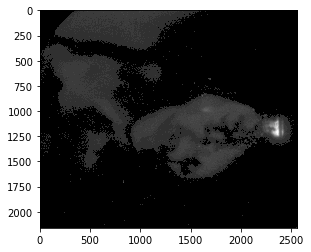

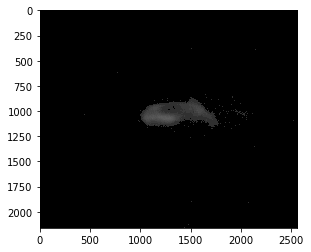

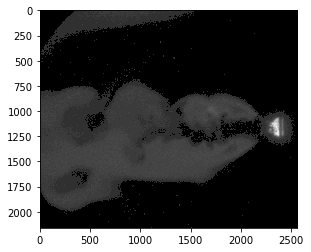

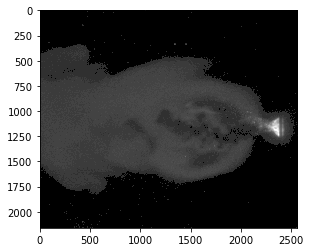

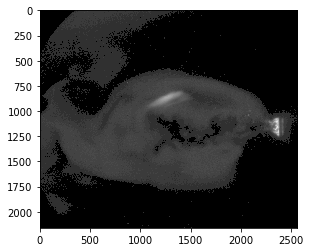

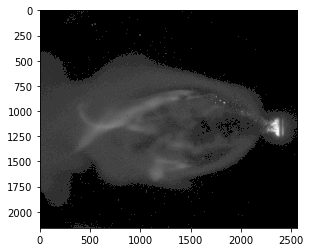

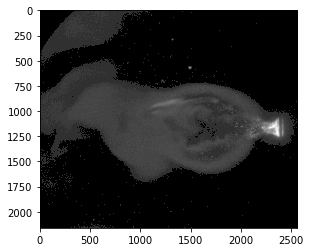

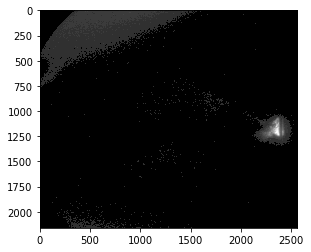

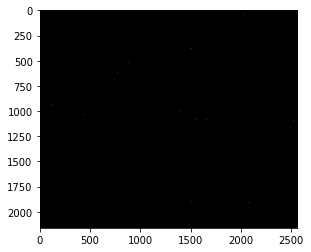

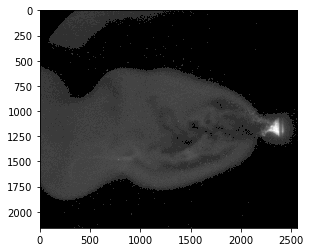

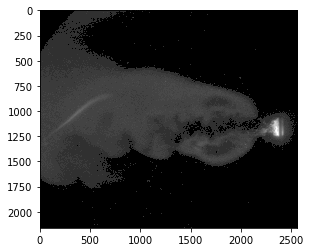

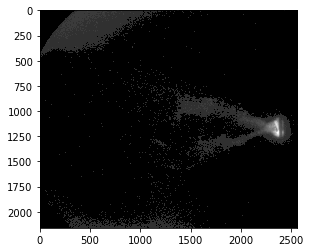

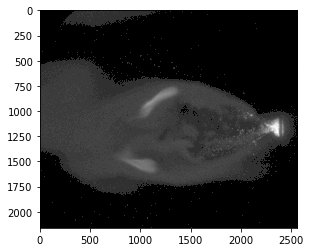

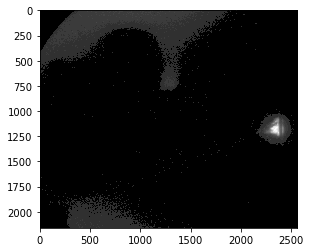

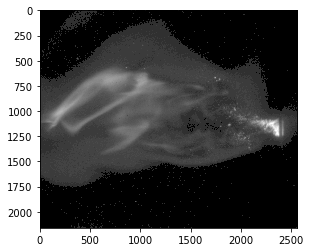

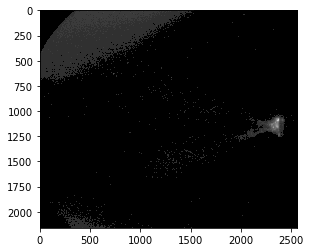

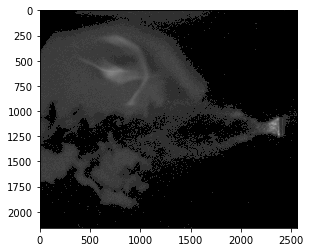

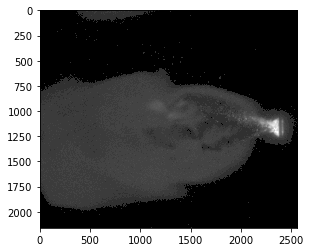

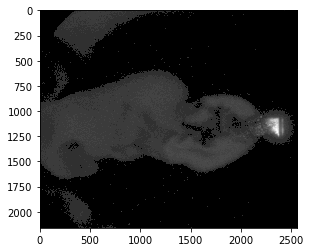

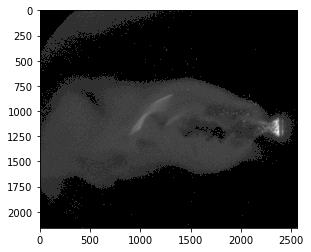

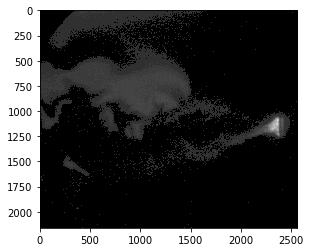

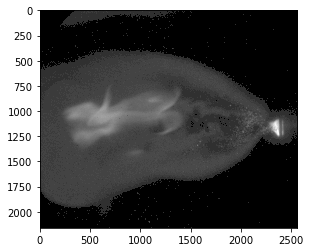

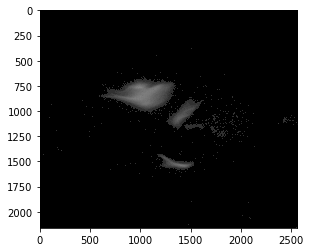

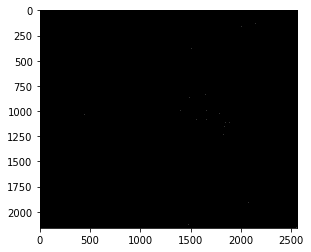

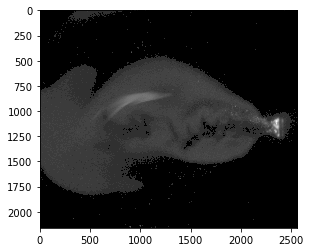

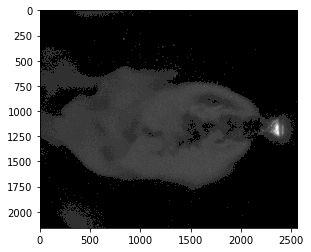

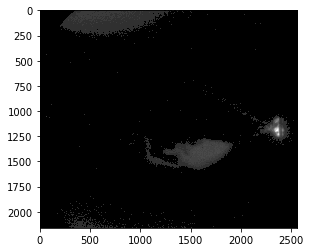

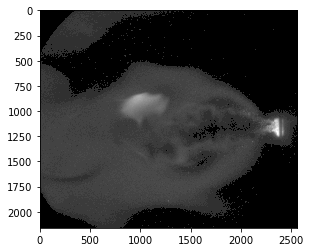

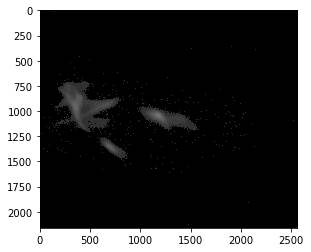

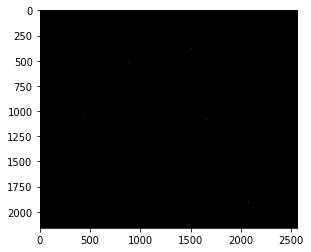

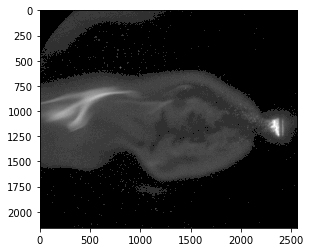

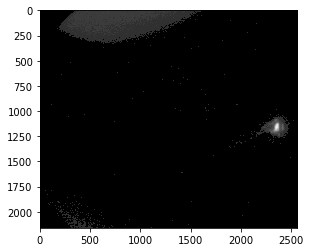

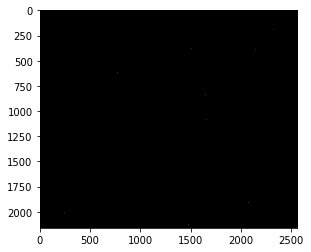

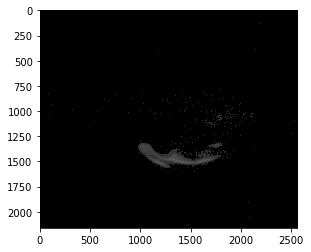

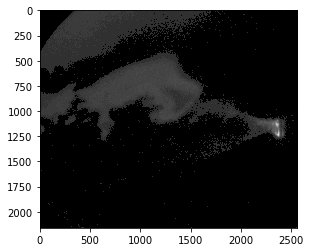

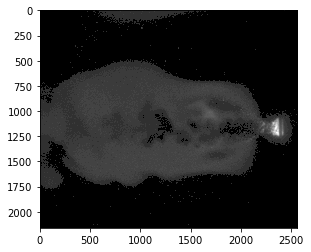

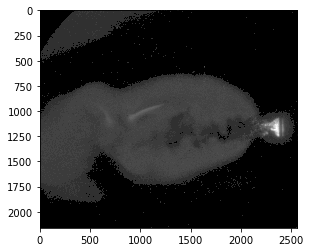

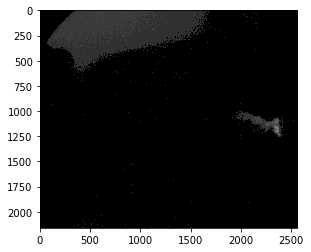

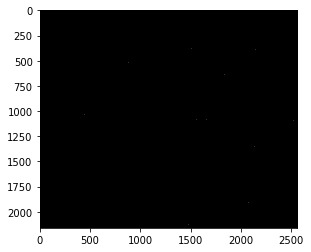

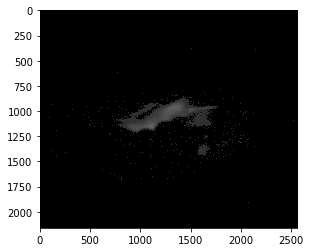

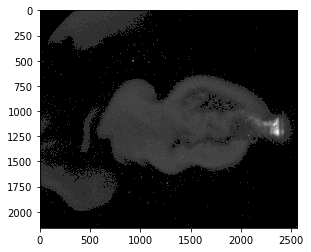

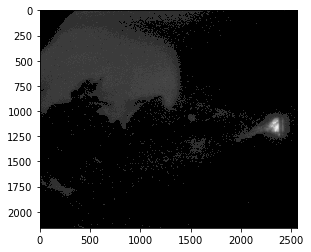

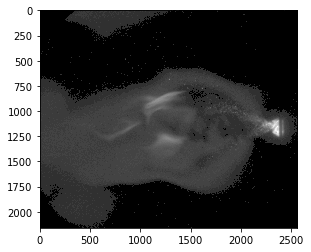

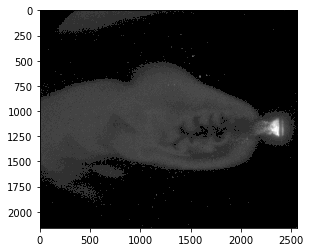

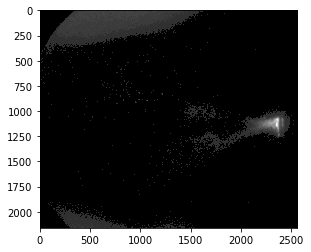

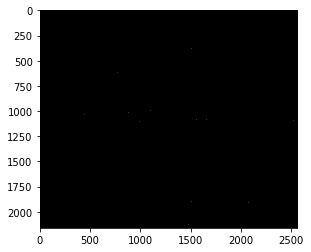

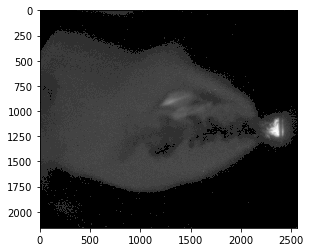

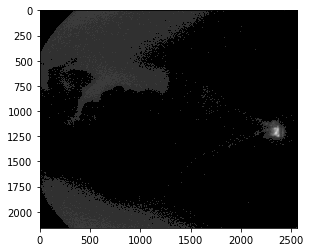

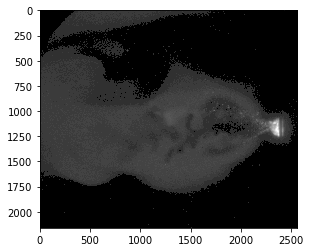

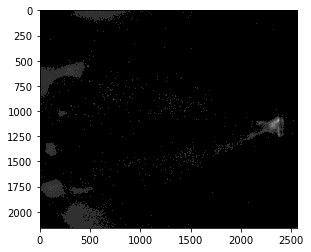

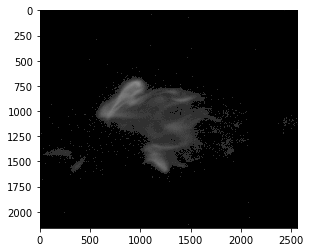

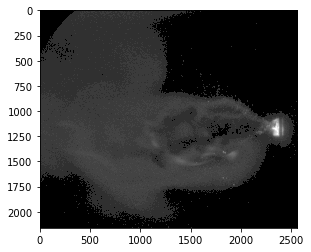

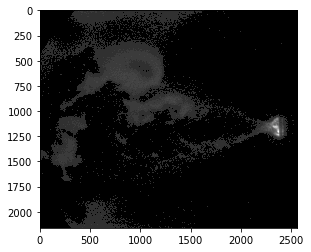

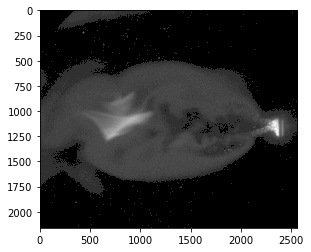

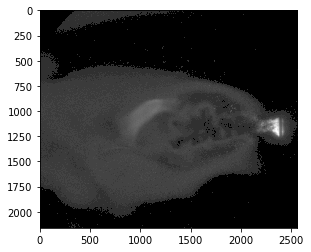

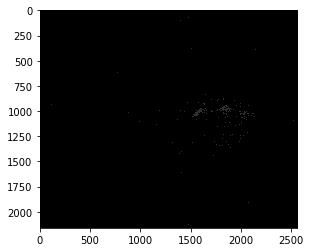

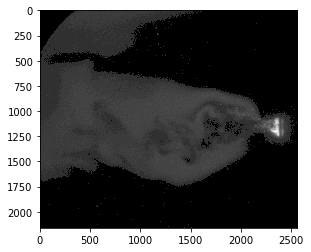

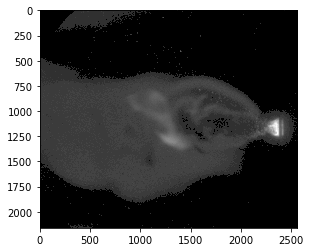

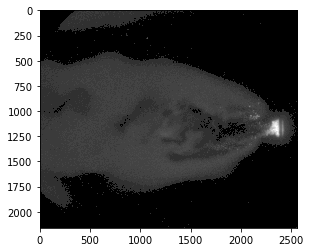

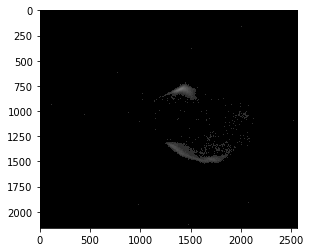

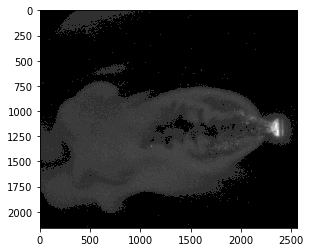

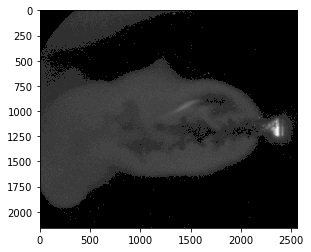

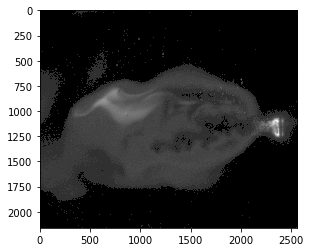

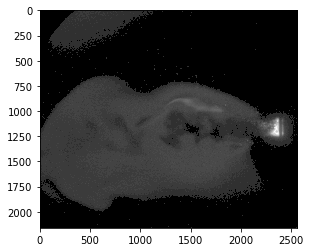

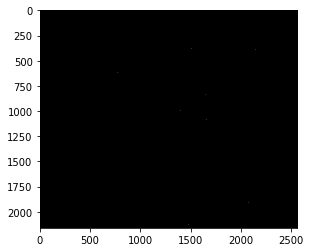

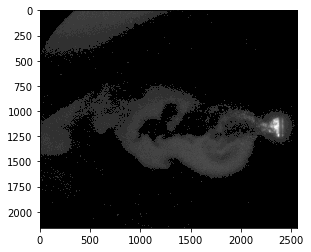

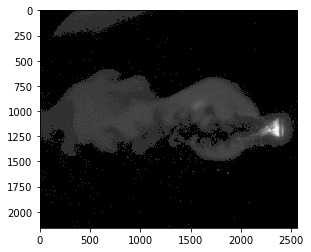

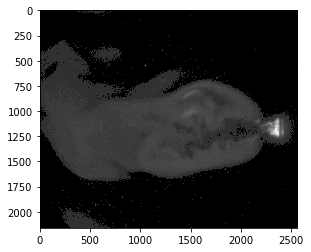

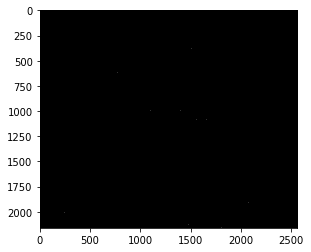

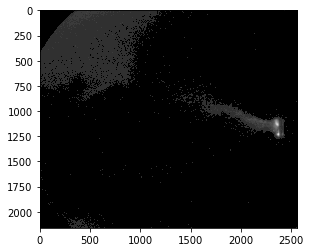

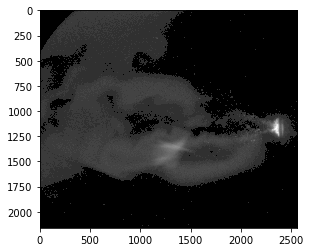

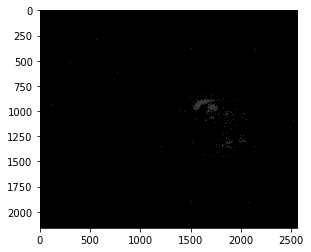

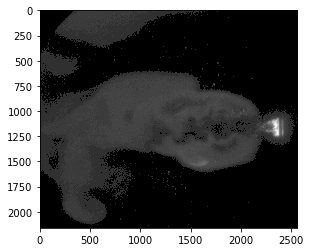

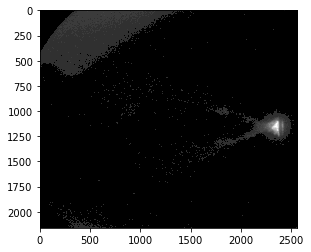

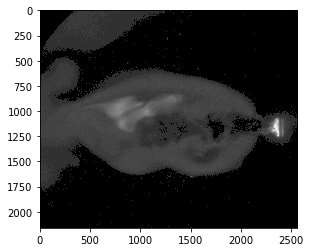

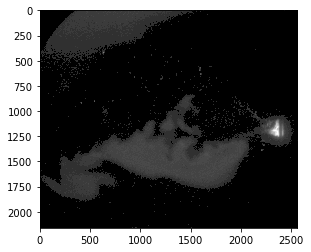

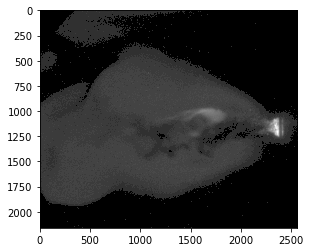

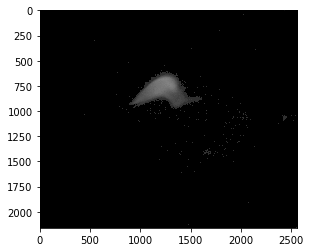

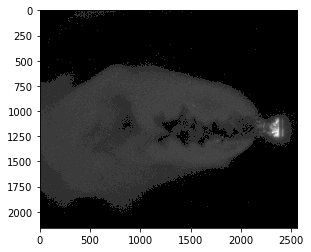

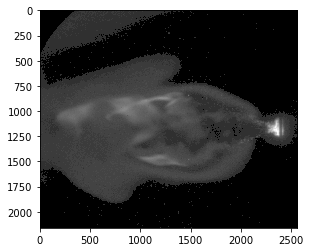

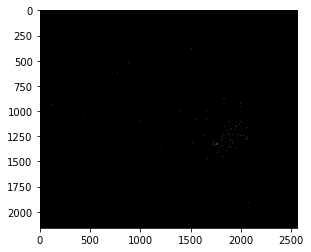

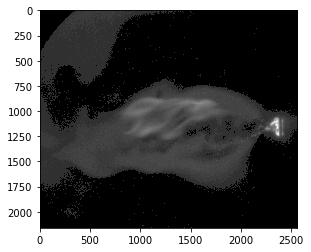

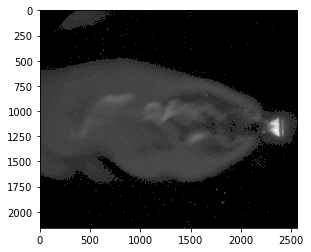

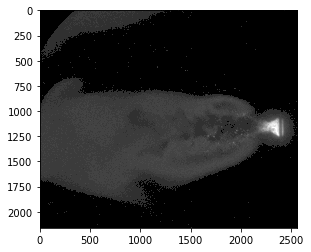

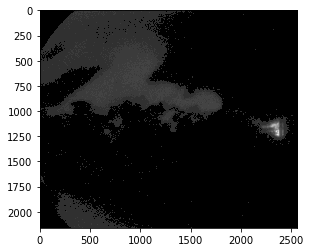

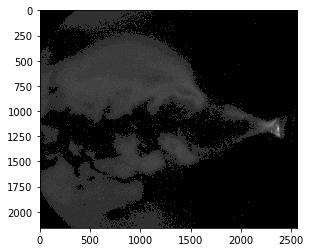

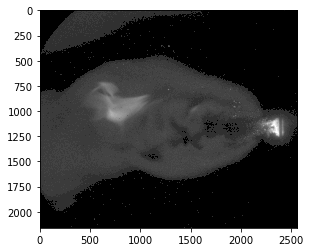

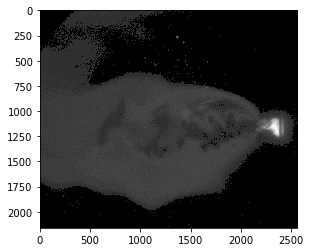

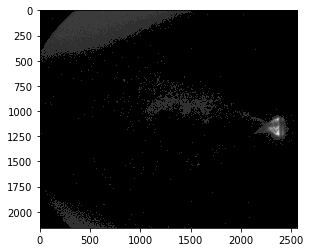

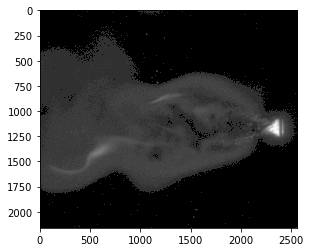

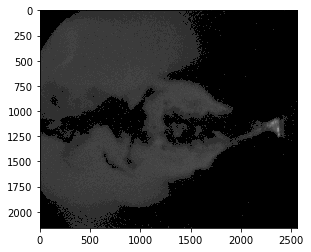

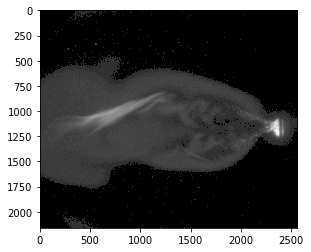

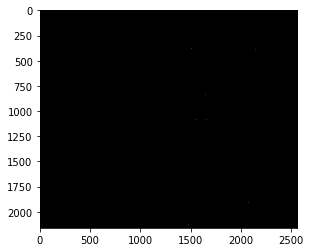

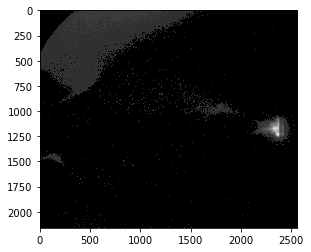

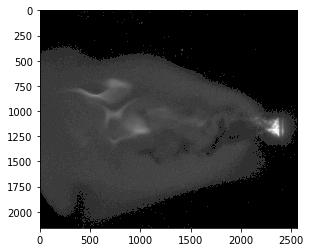

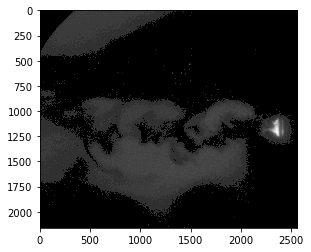

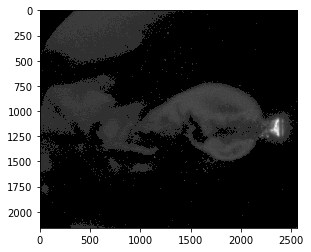

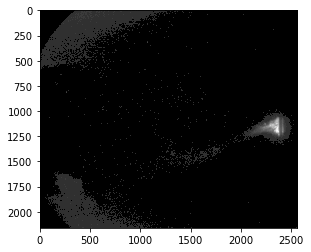

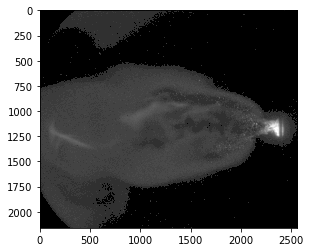

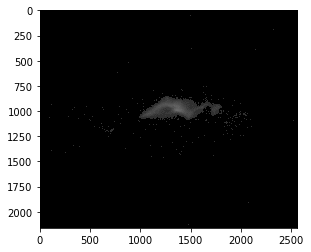

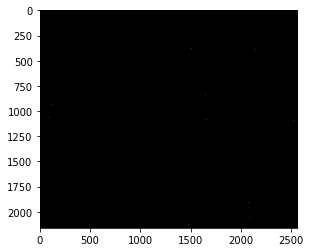

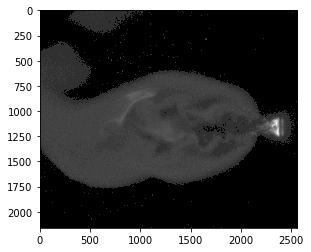

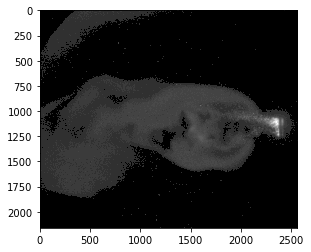

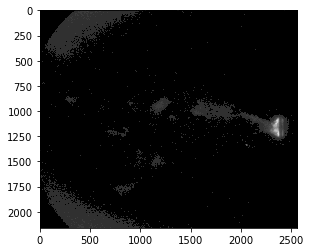

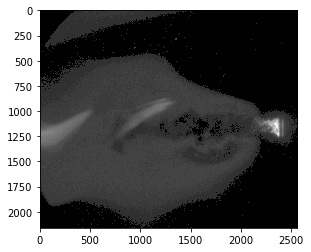

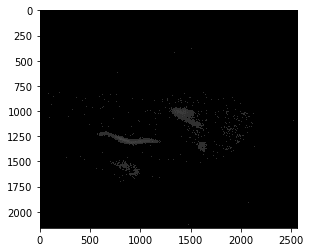

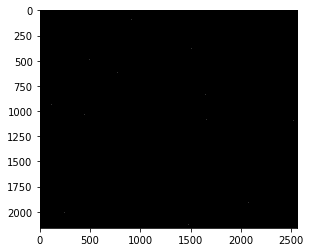

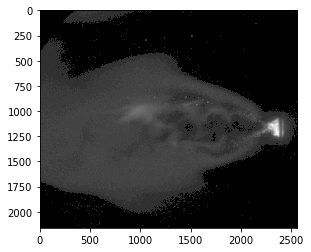

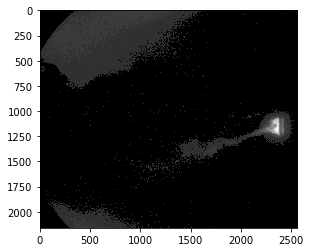

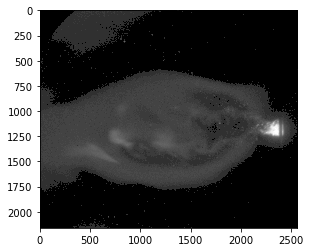

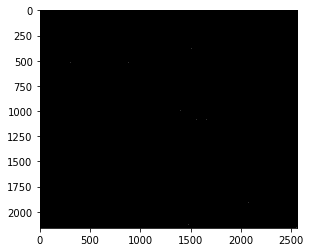

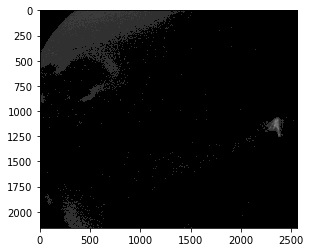

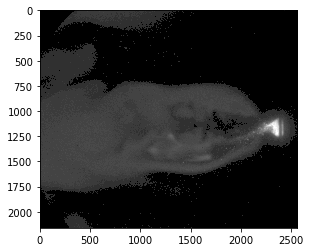

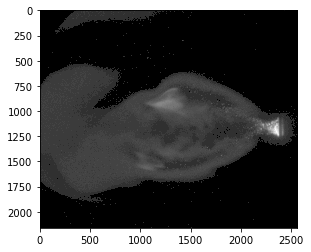

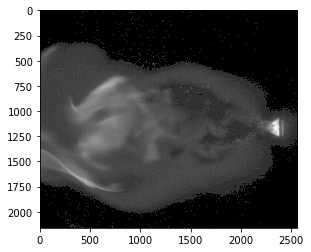

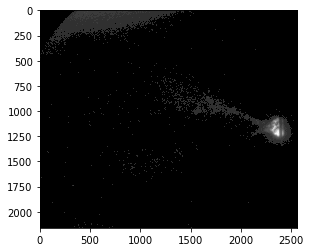

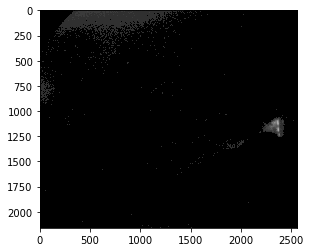

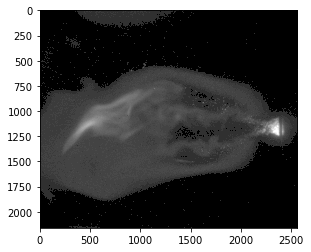

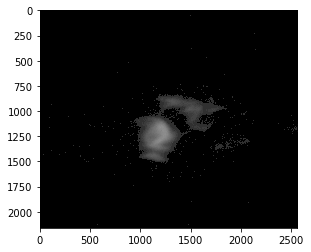

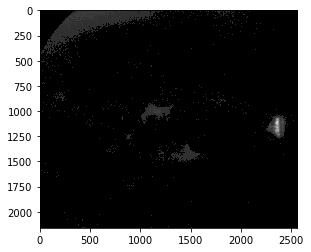

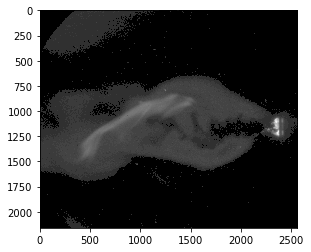

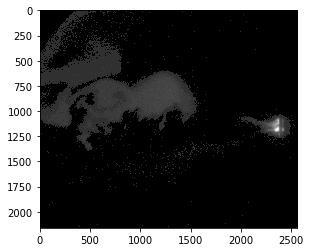

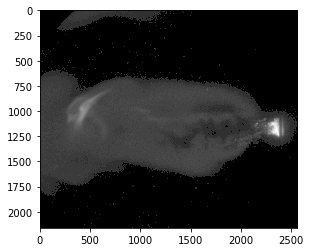

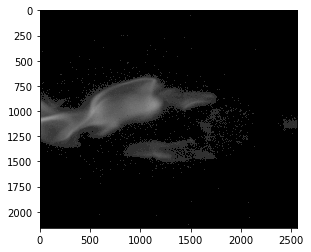

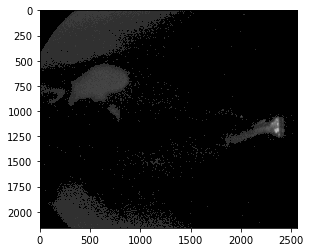

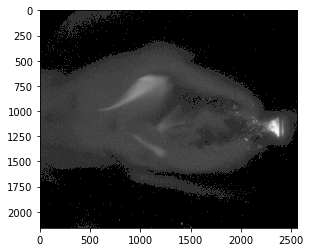

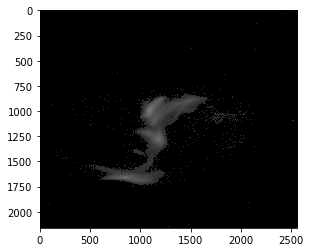

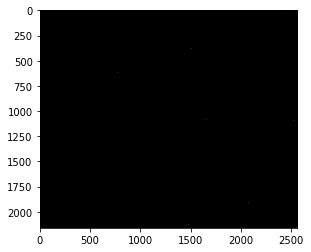

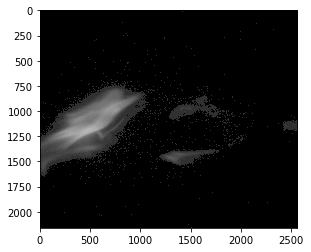

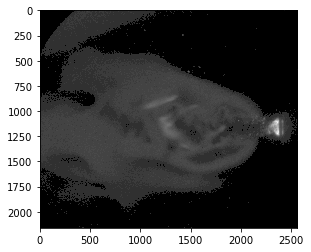

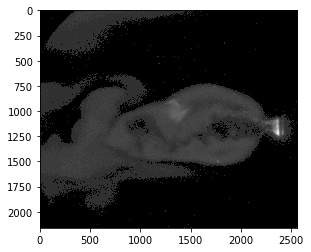

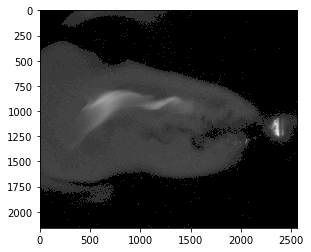

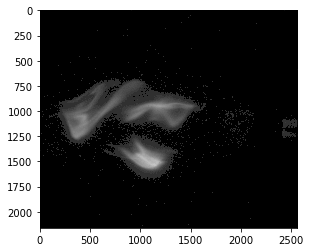

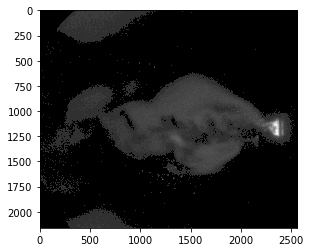

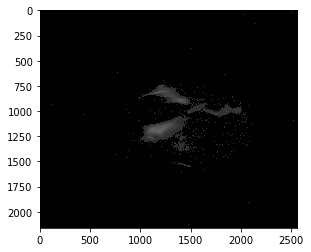

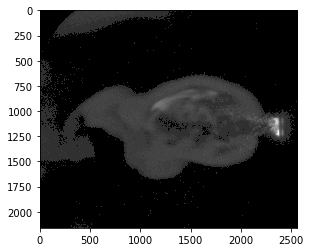

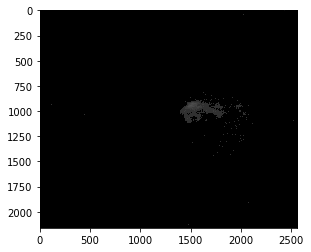

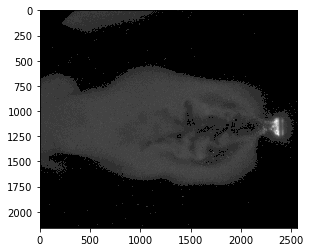

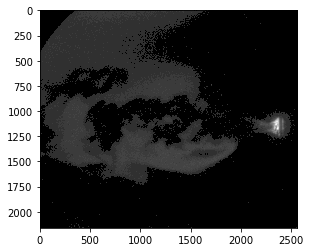

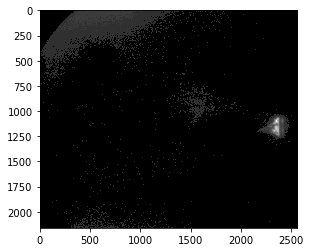

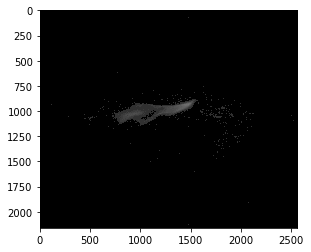

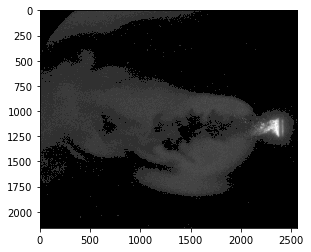

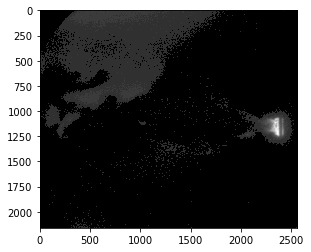

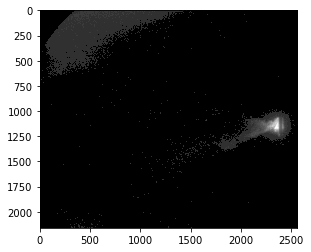

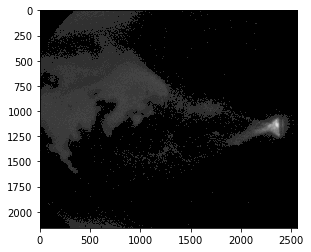

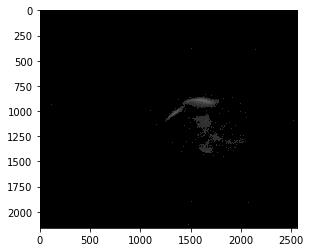

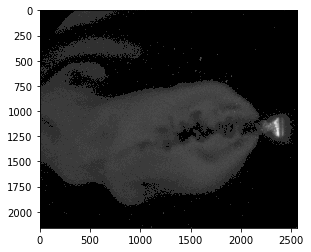

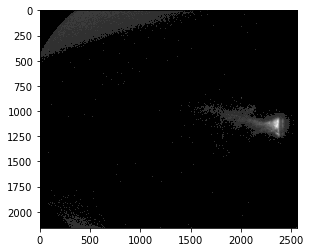

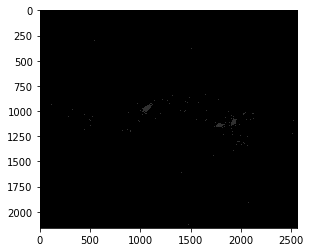

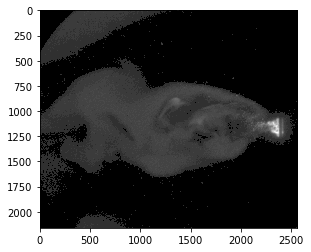

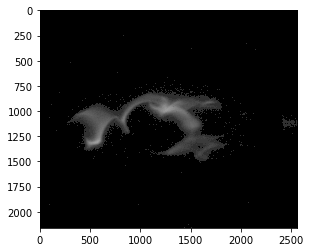

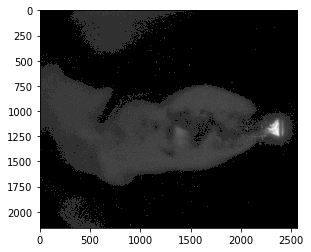

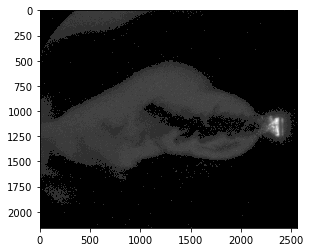

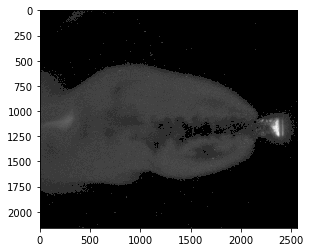

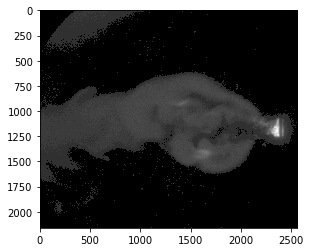

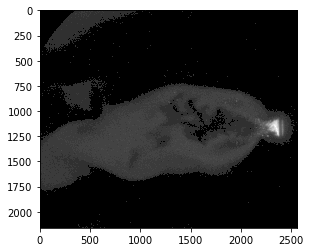

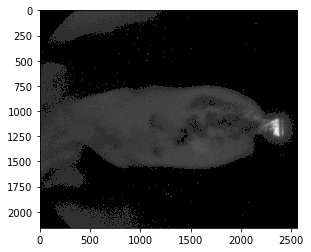

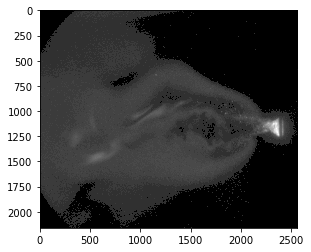

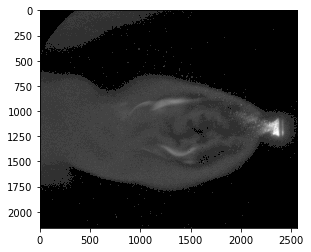

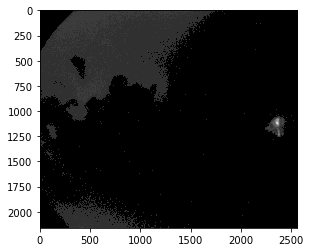

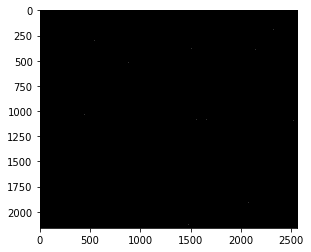

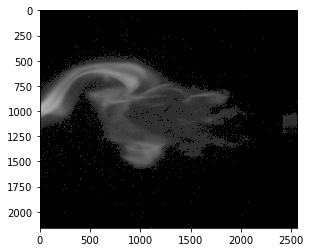

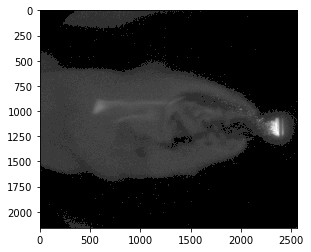

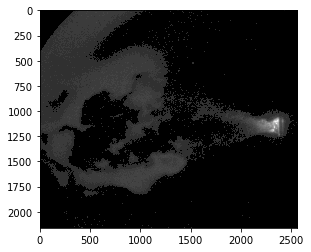

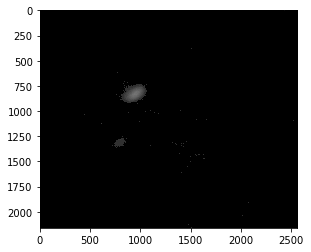

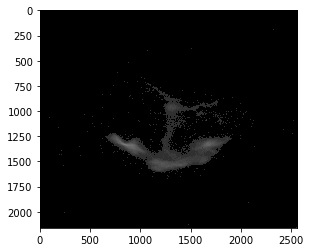

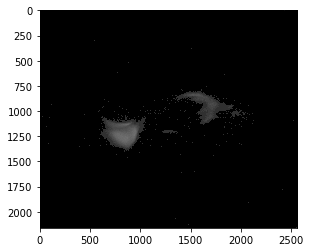

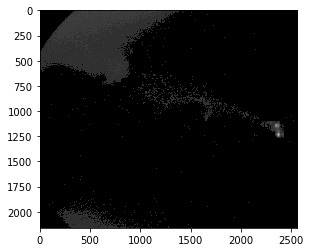

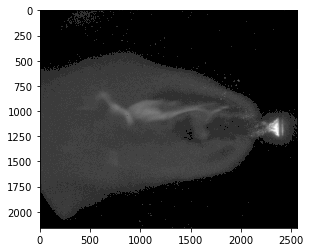

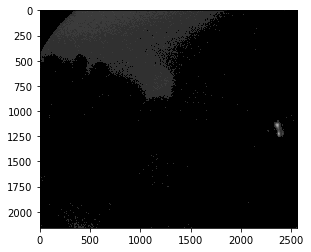

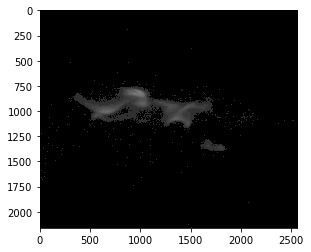

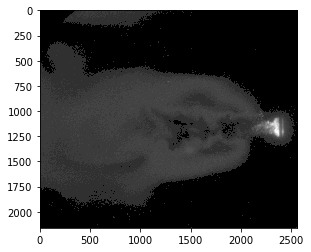

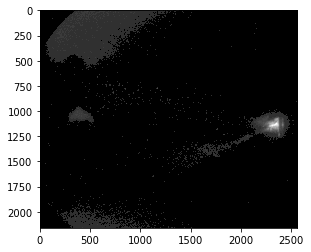

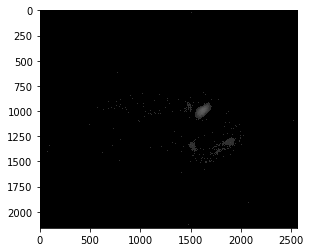

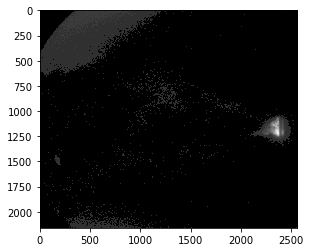

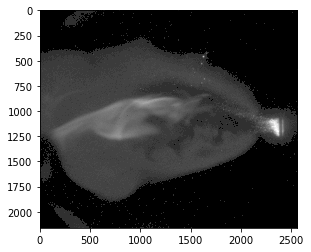

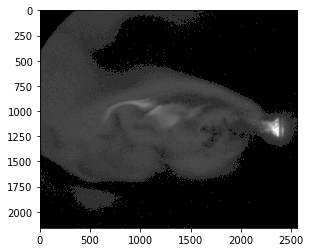

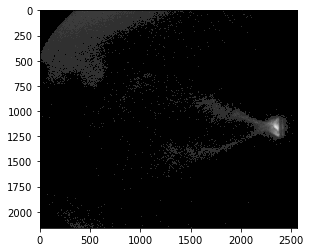

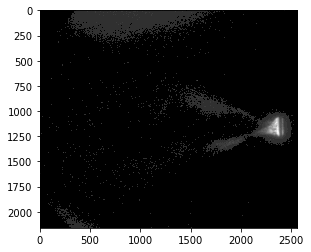

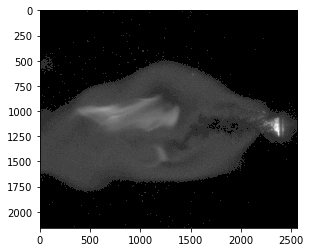

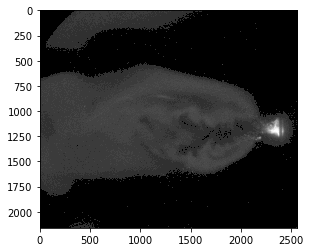

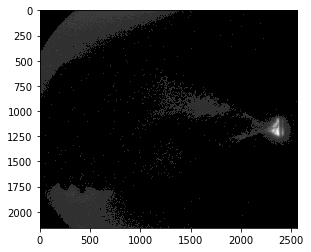

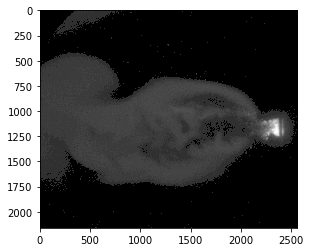

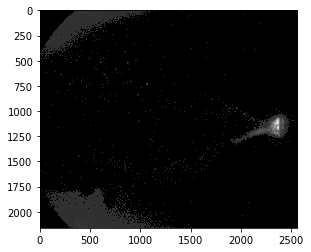

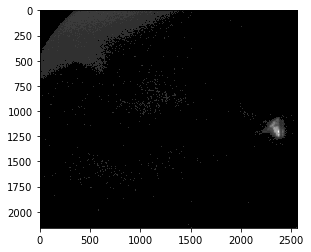

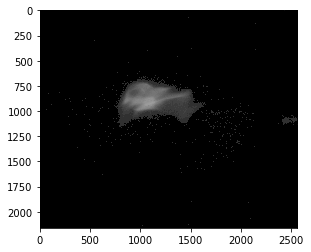

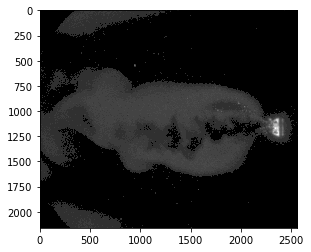

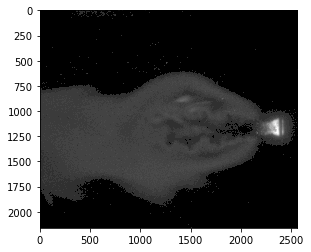

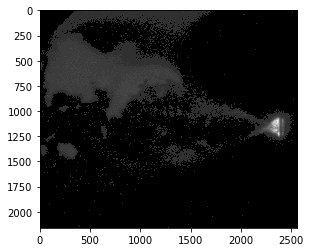

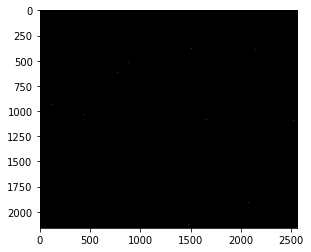

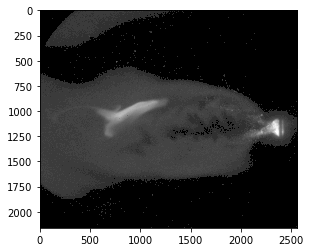

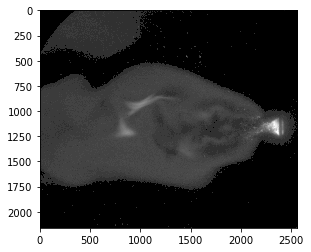

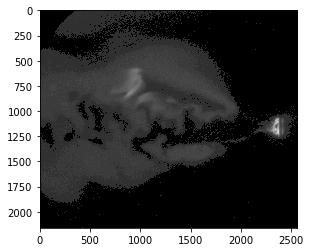

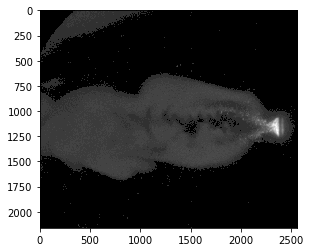

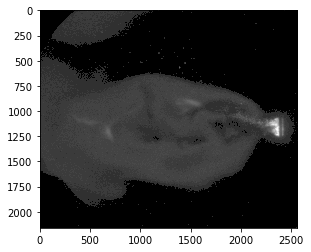

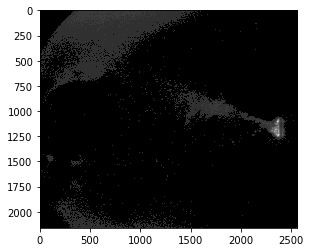

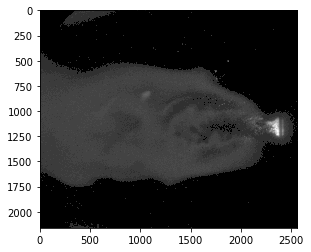

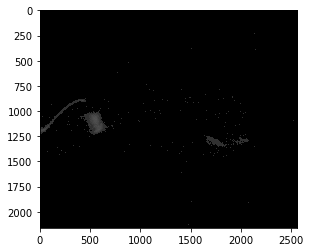

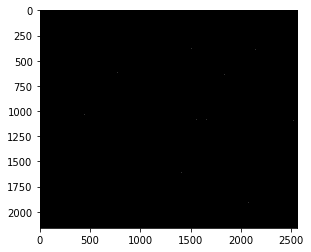

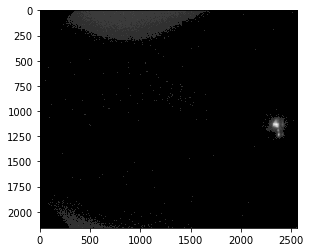

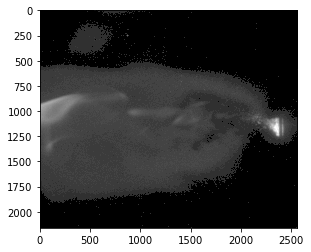

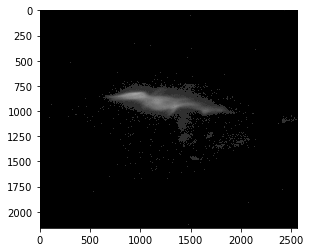

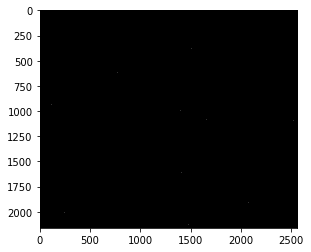

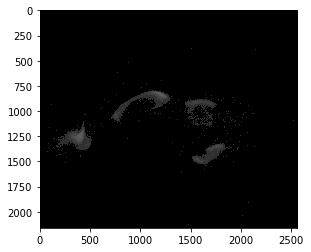

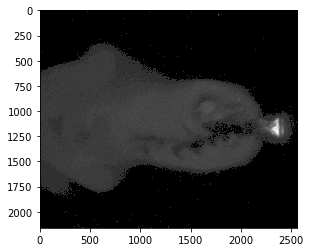

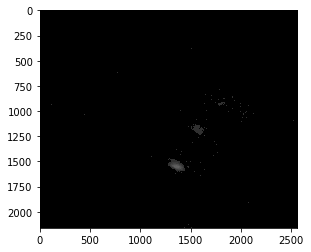

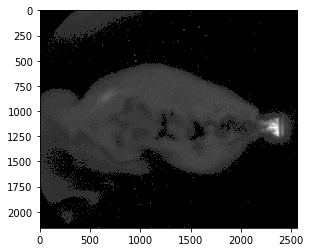

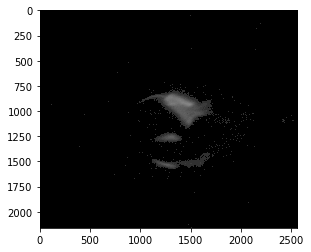

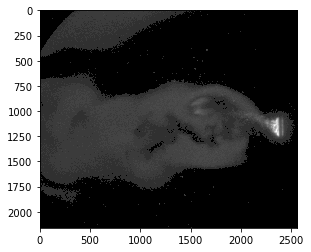

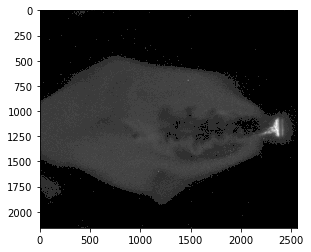

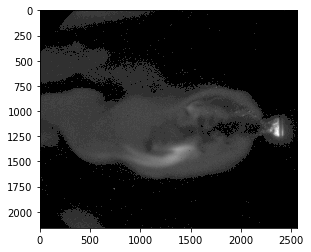

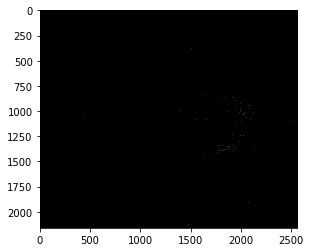

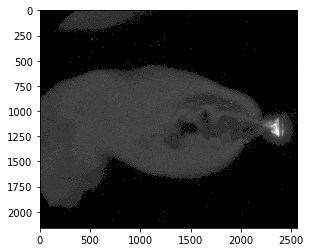

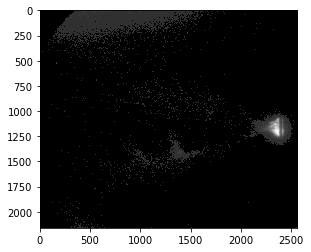

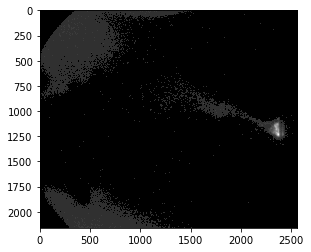

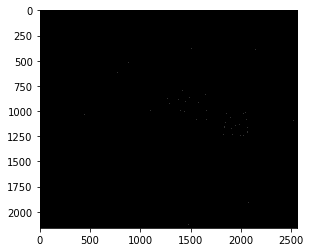

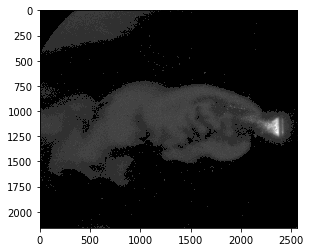

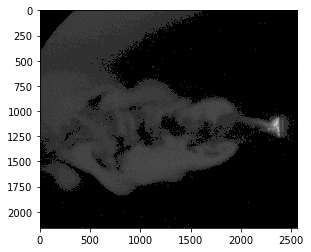

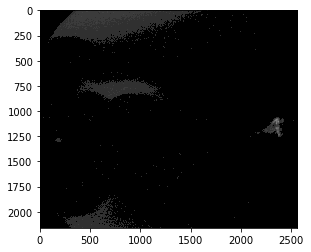

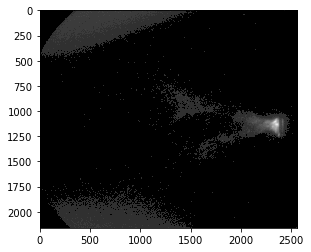

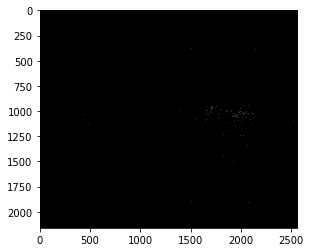

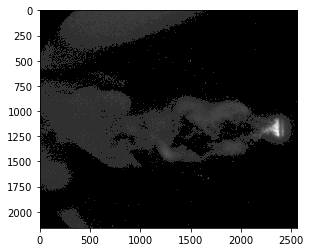

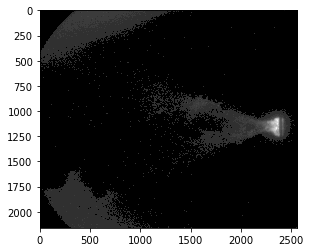

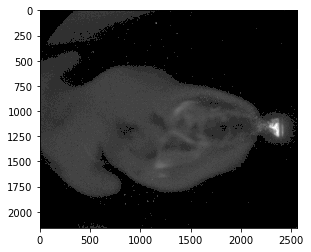

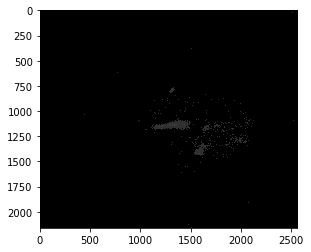

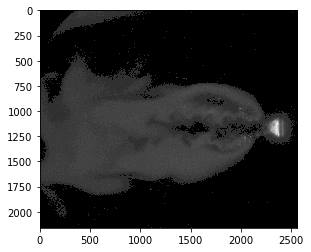

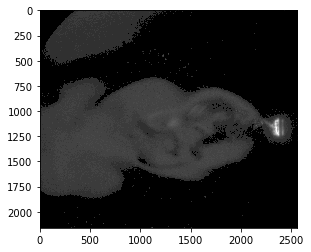

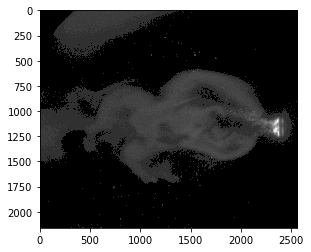

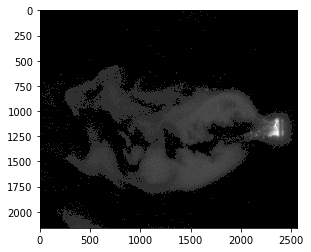

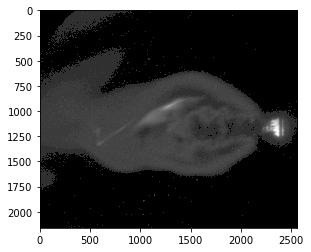

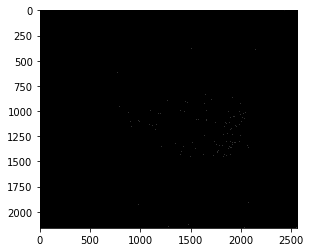

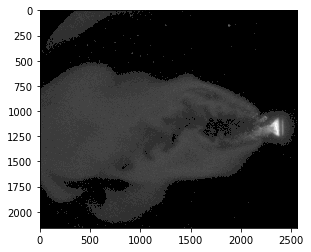

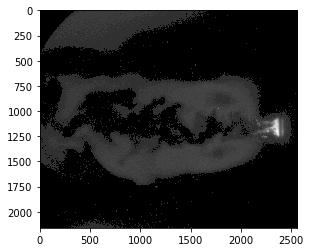

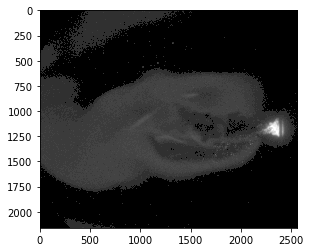

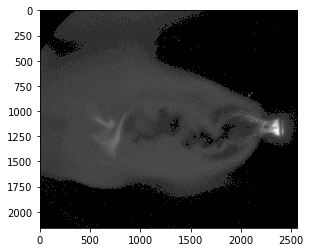

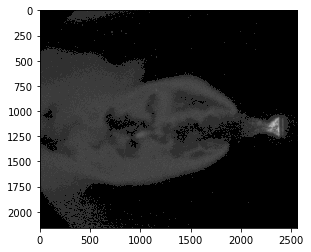

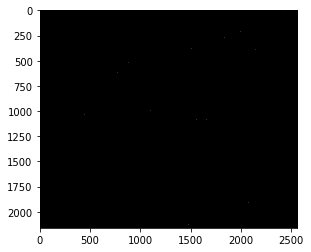

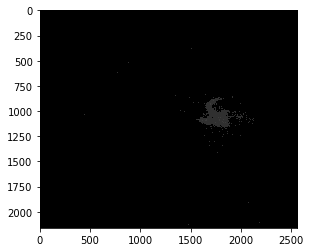

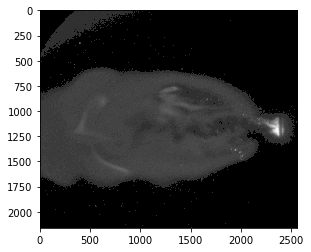

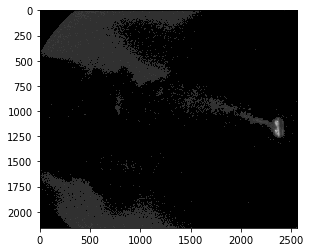

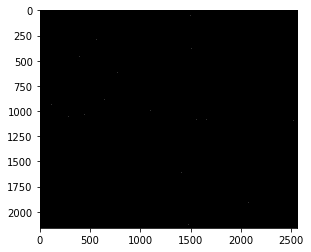

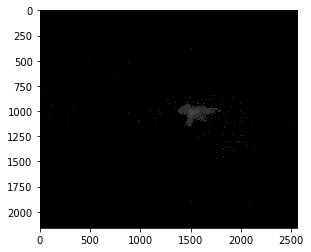

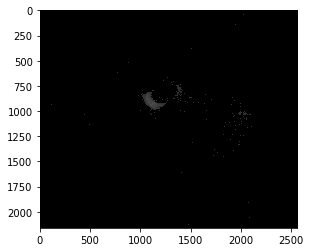

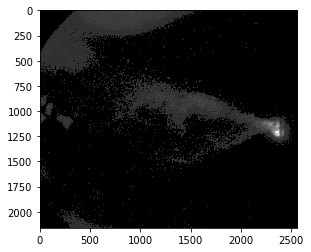

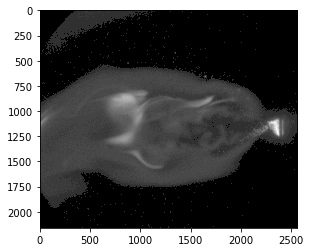

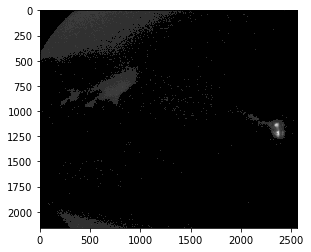

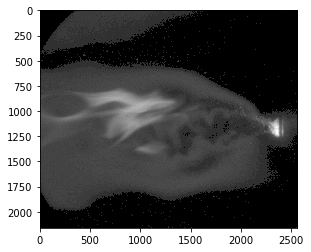

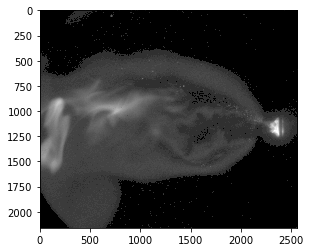

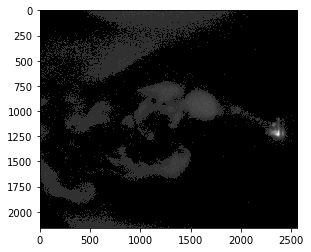

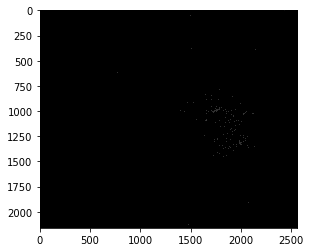

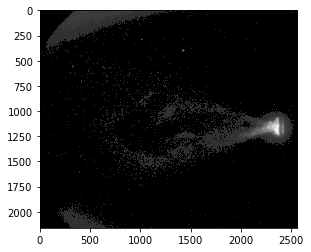

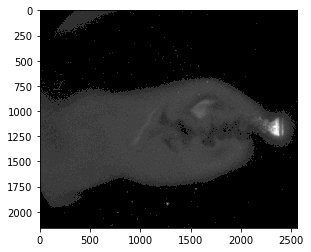

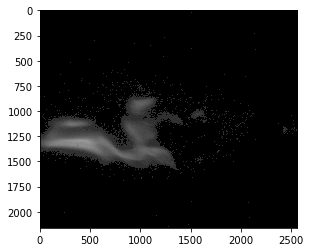

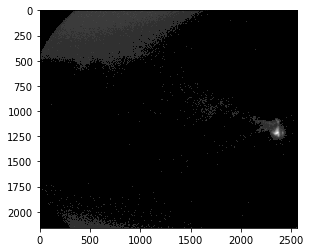

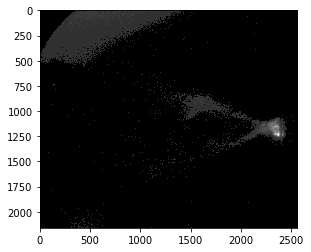

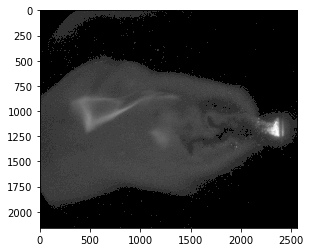

In [12]:
for filename in os.listdir(imagepath):
    image = imagepath+filename
    image = cv2.imread(image)
    plt.imshow(image)
    plt.show()
for filename in os.listdir(imagepath):
    image = imagepath+filename
    image = cv2.imread(image)
    image = image[1125:1300, 1700:2000]
    plt.imshow(image)
    plt.show()

In [37]:
for filename in os.listdir(imagepath):
    x = []
    image = imagepath+filename
    print(image)
    image = cv2.imread(image)
    s1 = LOG(image[250:600, 1000:2000])
    s2 = LOG(image[1000:1250, 2250:2500])
    s3 = LOG(image[1900:2000, 1000:2000])
    s4 = LOG(image[1125:1300, 1700:2000])
    avg = (s1+s2+s3+s4)/4
    training.append(avg)

Images_Nano/70Xy30AcN-3-6-25_OH000362.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000376.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000314.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000348.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000373.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000367.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000305.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000311.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000359.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000353.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000347.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000325.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000390.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000331.T000.D000.P000.H000

Images_Nano/70Xy30AcN-2-6-25_OH000324.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000346.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000369.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000394.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000335.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000357.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000301.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000363.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000349.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000310.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000372.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000358.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000344.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000350.T000.D000.P000.H000.PLIF

Images_Nano/70Xy30AcN-2-6-25_OH000369.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000352.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000346.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000324.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000391.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000330.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000385.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000378.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000400.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000372.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000366.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000304.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000310.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000363.T000.D000.P000.H000.

In [38]:
training

[4.75,
 4.75,
 0.0,
 12.25,
 5.5,
 1.0,
 0.0,
 8.5,
 8.25,
 25.25,
 8.0,
 0.5,
 10.25,
 15.75,
 8.75,
 10.0,
 15.0,
 1.25,
 6.75,
 6.75,
 0.0,
 17.75,
 5.5,
 0.25,
 7.25,
 5.75,
 4.5,
 5.75,
 8.75,
 19.5,
 8.75,
 8.75,
 0.0,
 6.25,
 11.25,
 10.0,
 0.0,
 18.25,
 7.75,
 5.0,
 14.25,
 8.25,
 9.5,
 0.5,
 14.0,
 0.0,
 11.25,
 5.75,
 7.75,
 8.5,
 3.5,
 1.75,
 0.0,
 7.0,
 7.5,
 23.25,
 5.25,
 16.75,
 7.75,
 7.25,
 15.5,
 3.0,
 8.75,
 10.25,
 25.75,
 4.75,
 10.25,
 0.25,
 7.5,
 8.0,
 2.5,
 13.25,
 0.25,
 0.0,
 4.75,
 4.25,
 0.0,
 2.75,
 27.25,
 11.5,
 7.0,
 11.5,
 0.0,
 2.75,
 7.5,
 13.75,
 6.25,
 6.5,
 10.0,
 0.0,
 12.25,
 29.0,
 17.0,
 1.0,
 16.0,
 14.5,
 18.75,
 10.0,
 5.25,
 0.5,
 10.0,
 6.0,
 17.75,
 3.75,
 4.25,
 8.0,
 6.5,
 5.75,
 0.0,
 5.25,
 12.0,
 8.0,
 0.0,
 5.5,
 22.5,
 3.0,
 9.75,
 4.25,
 14.25,
 13.25,
 14.0,
 1.75,
 10.25,
 5.5,
 3.75,
 3.5,
 4.75,
 7.25,
 8.5,
 18.75,
 4.75,
 7.5,
 4.0,
 2.0,
 16.0,
 6.5,
 0.0,
 7.5,
 6.0,
 12.5,
 11.75,
 2.75,
 2.75,
 2.75,
 0.0,
 12.5,
 4.75,

In [49]:
xaxis = []
for item in training:
    xaxis.append(random.uniform(1,2))

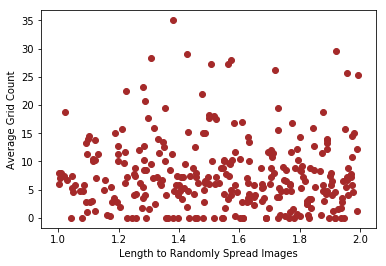

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.scatter(xaxis, training, color='brown')
plt.xlabel('Length to Randomly Spread Images')
plt.ylabel('Average Grid Count')
#plt.title(label='Laplacian Blob Detection Count for SEM Images')
#brown_patch = mpatches.Patch(color='brown', label='Blurry Images')
#blue_patch =mpatches.Patch(color='lightblue', label='Focused Images')
#plt.axhline(y=350, color='green', linestyle='-', linewidth = 3.5)
#plt.axhline(y=500, color='grey', linestyle='-')
#plt.axhline(y=200, color='grey', linestyle='-')
#plt.legend(handles=[brown_patch, blue_patch])

plt.show()

In [28]:
labels = []
for filename in os.listdir(imagepath):
    x = []
    image = imagepath+filename
    print(image)
    image = cv2.imread(image)
    num = LOG(image)
    if (num<10 or num > 450):
        labels.append("Spill!")
    else: 
        labels.append("No Spill!")

Images_Nano/70Xy30AcN-3-6-25_OH000362.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000376.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000314.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000348.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000373.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000367.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000305.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000311.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000359.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000353.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000347.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000325.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000390.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000331.T000.D000.P000.H000

Images_Nano/70Xy30AcN-2-6-25_OH000385.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000324.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000346.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000369.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000394.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000335.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000357.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000301.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000363.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000349.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000310.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000372.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000358.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000344.T000.D000.P000.H000.PLIF1

Images_Nano/70Xy30AcN-2-10-25_OH000394.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000321.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000369.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000352.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000346.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000324.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000391.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000330.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000385.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-6-25_OH000378.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000400.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-2-10-25_OH000372.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000366.T000.D000.P000.H000.PLIF1.TIF.TIF
Images_Nano/70Xy30AcN-3-6-25_OH000304.T000.D000.P000.H000.P

In [34]:
rf_df = pd.DataFrame(columns = ['B1', 'B2', 'B3', 'B4', 'Type'])
i = 0
for arr in training:
    rf_df = rf_df.append({'B1': arr[0], 'B2': arr[1], 'B3': arr[2], 'B4': arr[3], 'Type': labels[i]}, ignore_index=True)
    i = i + 1

In [30]:
X = training
y = labels

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: setting an array element with a sequence.

# K-Means Clustering

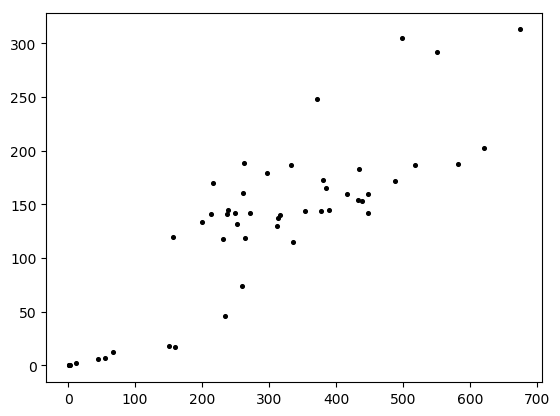

In [102]:
# Getting the values and plotting it
f1 = df['B1'].values
f2 = df['B2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [104]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [105]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[554. 240.]
 [394. 842.]]


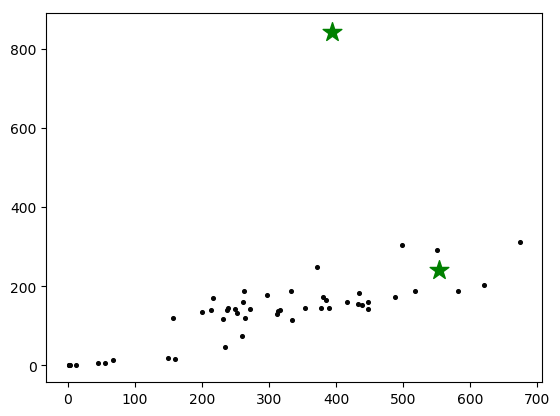

In [174]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')